# **自然言語・可視化・分析ライブラリ**
Word Cloud、nlplot（頻出ワードグラフや共起ネットワーク等の可視化や分析）、TF-IDF計算を実行します。\
分析したい文書をテキストファイルに貼って読み込ませ、「ランタイム→すべてのセルを実行」するだけです。\
前処理（改行, 空白等の処理）→形態素分析→各種視覚化は自動で行います。
- [**注意**] テキストファイル名は「sample.txt」としてください。
- [**注意**] テキストファイルは文字コードを「UTF-8」としてください。

# **ライブラリのインストール**

In [1]:
pip install nlplot

     |████████████████████████████████| 967 kB 30.7 MB/s 
     |████████████████████████████████| 23.9 MB 1.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (8,121 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [3]:
#Mecabのインストール
!pip install mecab-python3==0.996.5

     |████████████████████████████████| 17.1 MB 71 kB/s 


In [4]:
from pathlib import Path
import pandas as pd
import re
import MeCab
import matplotlib.pyplot as plt

# **テキストファイル & ストップワード指定**
- Word Cloudに表示したくないワードがあれば、任意に追加してください。

In [5]:
#テキストファイル名を指定（※textファイルの文字コードは「UTF-8」としてください）
filename = 'sample.txt'

In [6]:
#ストップワード設定
stop_words = ["し","い","ある", "おる", "せる", "ない", "いる", "する", "の", "よう", "なる", "それ", "そこ", "これ", "こう", "ため", "そう", "れる", "られる"]

# **モジュール構築**
- 前処理（改行や空白の処理、センテンス化）や形態素分析、ワード出現回数処理を行います。
- 文章をワードに分解後、一般名詞・動詞・形容詞（動詞と形容詞は基礎型）のみを取り出しています。（※追加や変更はコード操作が必要です）


In [7]:
with open(filename, 'r', encoding='utf-8') as file:
    lines = file.readlines()

lines = [l.strip() for l in lines]

with open(filename, 'r', encoding='utf-8') as all:
    all_text = all.readlines()

all_text = [l.strip() for l in all_text]

sentences = []
for sentence in lines:
    texts = sentence.split('。')
    sentences.extend(texts)

In [8]:
all_text = ''.join(all_text)
all_text

'私《わたくし》はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚《はば》かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執《と》っても心持は同じ事である。よそよそしい頭文字《かしらもじ》などはとても使う気にならない。私が先生と知り合いになったのは鎌倉《かまくら》である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書《はがき》を受け取ったので、私は多少の金を工面《くめん》して、出掛ける事にした。私は金の工面に二《に》、三日《さんち》を費やした。ところが私が鎌倉に着いて三日と経《た》たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧《すす》まない結婚を強《し》いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心《かんじん》の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。けれども実際彼の母が病気であるとすれば彼は固《もと》より帰るべきはずであった。それで彼はとうとう帰る事になった。せっかく来た私は一人取り残された。学校の授業が始まるにはまだ大分《だいぶ》日数《ひかず》があるので鎌倉におってもよし、帰ってもよいという境遇にいた私は、当分元の宿に留《と》まる覚悟をした。友達は中国のある資産家の息子《むすこ》で金に不自由のない男であったけれども、学校が学校なのと年が年なので、生活の程度は私とそう変りもしなかった。したがって一人《ひとり》ぼっちになった私は別に恰好《かっこう》な宿を探す面倒ももたなかったのである。宿は鎌倉でも辺鄙《へんぴ》な方角にあった。玉突《たまつ》きだのアイスクリームだのというハイカラなものには長い畷《なわて》を一つ越さなければ手が届かなかった。車で行っても二十銭は取られた。けれども個人の別荘はそこここにいくつでも建てられていた。それに海へはごく近いので海水浴をやるには至極便利な地位を占めていた。

In [9]:
#抽出したワードをデータフレームdfに
import pandas as pd
import numpy as np

df_text = pd.DataFrame(sentences, columns = ['text'], index=None)

#空白をNaNに置き換え
df_text['text'].replace('', np.nan, inplace=True)

#Nanを削除 inplace=Trueでdf上書き
df_text.dropna(subset=['text'], inplace=True)

df_text[:15]

,text
0,私《わたくし》はその人を常に先生と呼んでいた
1,だからここでもただ先生と書くだけで本名は打ち明けない
2,これは世間を憚《はば》かる遠慮というよりも、その方が私にとって自然だからである
3,私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる
4,筆を執《と》っても心持は同じ事である
5,よそよそしい頭文字《かしらもじ》などはとても使う気にならない
7,私が先生と知り合いになったのは鎌倉《かまくら》である
8,その時私はまだ若々しい書生であった
9,暑中休暇を利用して海水浴に行った友達からぜひ来いという端書《はがき》を受け取ったので、私は多...
10,私は金の工面に二《に》、三日《さんち》を費やした


In [10]:
#形態素解析（一般名詞・動詞・形容詞（動詞と形容詞は基礎型）を抽出対象とした）
#スペース区切り分かち書き
def mecab_analysis(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
                if sub_type in ['一般']:
                    word = node.surface
                    words.append(word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words)

#カンマ区切り分かち書き
def mecab_analysis2(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words2 = []

    while(node):

        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            if word_type in ['名詞']:  # 名詞をリストに追加する
                if sub_type in ['一般']:
                    words2.append(node.surface)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                    words2.append(features_[6])

        node = node.next
        if node is None:
            break
    return words2

#スペース区切り分かち書き（全文書一括）
def mecab_analysis3(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(all_text)

    words3 = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
                if sub_type in ['一般']:
                    all_text_word = node.surface
                    words3.append(all_text_word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words3.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words3)

#形態素結果をリスト化し、データフレームdf_textに列を追加して格納
df_text['words'] = df_text['text'].apply(mecab_analysis)
df_text['words2'] = df_text['text'].apply(mecab_analysis2)

df_text[:15]

,text,words,words2
0,私《わたくし》はその人を常に先生と呼んでいた,人 先生 呼ぶ,"[人, 先生, 呼ぶ]"
1,だからここでもただ先生と書くだけで本名は打ち明けない,先生 書く 本名 打ち明ける,"[先生, 書く, 本名, 打ち明ける]"
2,これは世間を憚《はば》かる遠慮というよりも、その方が私にとって自然だからである,世間 憚 ば かるい いう,"[世間, 憚, ば, かるい, いう]"
3,私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる,人 呼ぶ 起す 先生 いう,"[人, 呼ぶ, 起す, 先生, いう]"
4,筆を執《と》っても心持は同じ事である,筆 執る 心持,"[筆, 執る, 心持]"
5,よそよそしい頭文字《かしらもじ》などはとても使う気にならない,よそよそしい 頭文字 かしら 使う,"[よそよそしい, 頭文字, かしら, 使う]"
7,私が先生と知り合いになったのは鎌倉《かまくら》である,先生 知り合い かまくら,"[先生, 知り合い, かまくら]"
8,その時私はまだ若々しい書生であった,若々しい 書生,"[若々しい, 書生]"
9,暑中休暇を利用して海水浴に行った友達からぜひ来いという端書《はがき》を受け取ったので、私は多...,暑中 休暇 海水浴 行く 友達 来る 端書 はがき 受け取る 金 くめる 出掛ける,"[暑中, 休暇, 海水浴, 行く, 友達, 来る, 端書, はがき, 受け取る, 金, くめ..."
10,私は金の工面に二《に》、三日《さんち》を費やした,金 ちる 費やす,"[金, ちる, 費やす]"


In [11]:
#全文書の形態素結果をデータフレームdfに格納
df = pd.Series(all_text)
df = df.apply(mecab_analysis3)

In [12]:
#カンマ区切り分かち書きしたワードをリスト化
words_list = df_text.words2.tolist()
words_list = sum(words_list,[])

from collections import Counter

#出現回数を集計し、最頻順にソートし、resultに格納
words_count = Counter(words_list)
result = words_count.most_common()

#出現回数結果を画面に出力
for word, cnt in result:
    print(word, cnt)

先生 597
いう 551
奥さん 388
来る 329
思う 294
父 272
自分 264
見る 234
い 233
聞く 219
行く 209
出る 185
人 173
母 171
お嬢さん 166
帰る 153
出す 145
できる 145
考える 129
顔 128
言葉 128
みる 123
眼 123
く 119
うち 118
くれる 116
知る 114
下げ 111
見出し 111
妻 108
心 102
しまう 100
見える 97
立つ 96
答える 92
間 90
死ぬ 90
口 89
くる 88
やる 82
通り 82
知れる 79
あと 78
女 77
手 75
宅 75
頭 74
手紙 74
書く 73
家 73
外 71
人間 71
叔父 70
向う 68
もつ 67
室 67
男 66
気 66
がる 62
兄 62
様子 61
悪い 60
話す 60
取る 59
声 59
心持 57
おく 56
坐る 56
くい 55
ちる 54
態度 54
付く 52
強い 52
笑う 52
歩く 51
得る 51
始める 50
読む 50
呼ぶ 48
違う 48
分る 47
動く 47
持つ 47
置く 47
ひる 46
起る 46
ひと 46
いく 44
見せる 43
える 43
先 43
傍 41
一つ 40
風 40
いっしょ 40
他 40
黙る 40
胸 40
め 39
調子 39
過ぎる 38
へや 38
下さる 38
いい 37
学校 37
かかる 37
忘れる 37
上げる 37
てる 36
信じる 35
若い 35
よい 35
寝る 35
眺 35
与える 35
頼む 35
書物 35
驚く 35
医者 35
身体 34
落ちる 34
気が付く 34
新しい 34
世の中 34
変る 34
はいる 33
こ 33
気分 33
すう 33
生きる 33
打ち明ける 32
長い 32
うる 32
会う 31
繰り返す 31
聞こえる 31
もらう 31
例 30
下 30
感じる 30
進む 30
友達 29
す 29
尋ねる 29
付ける 29
開ける 29
恋 29
世間 28
機会 28
掛ける 28
力 28
受ける 28
そば 28
財産 28
着く 27
代り 27
早い 27
墓 26
ゆく 26
まつ 26
つ

# **Word Cloud**
ワードクラウドは、文章中で出現頻度が高い単語を複数選び出し、その頻度に応じた大きさで図示する手法です。\
ワードクラウドは任意の形状に描画できるため、以下では①長方形（通常）と②ドーナツ型の2パターンで示しています。

## **Word Cloud** 

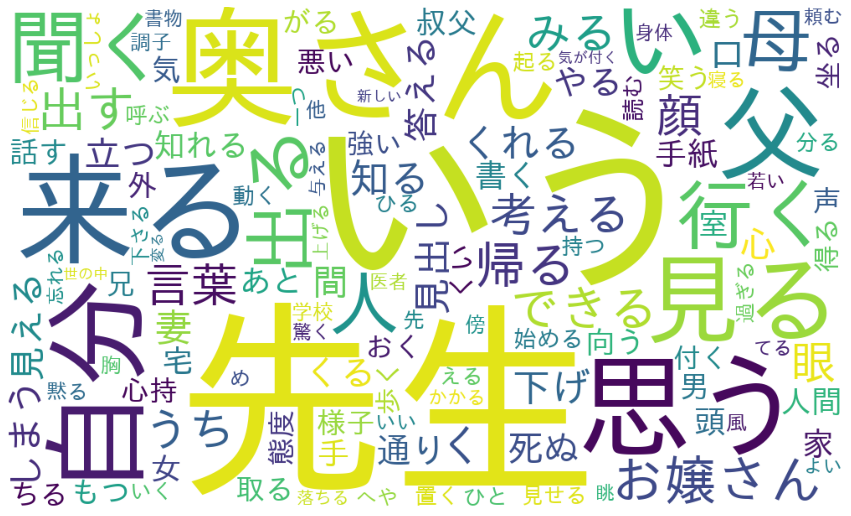

In [13]:
#wordcloud取込用にresultを辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).fit_words(dic_result)

#生成した画像の表示
import matplotlib.pyplot as plt 
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Word cloud in a donut shape**

In [14]:
#画像データダウンロード（biwakoの画像リンクもあり。変更する場合は#調整）
import requests

url = "https://github.com/hima2b4/Word-Cloud/raw/main/donuts.png"
#url = "https://github.com/hima2b4/Word-Cloud/raw/main/biwa.png"

file_name = "donuts.png"
#file_name = "biwa.png"

response = requests.get(url)
image = response.content

with open(file_name, "wb") as f:
    f.write(image)

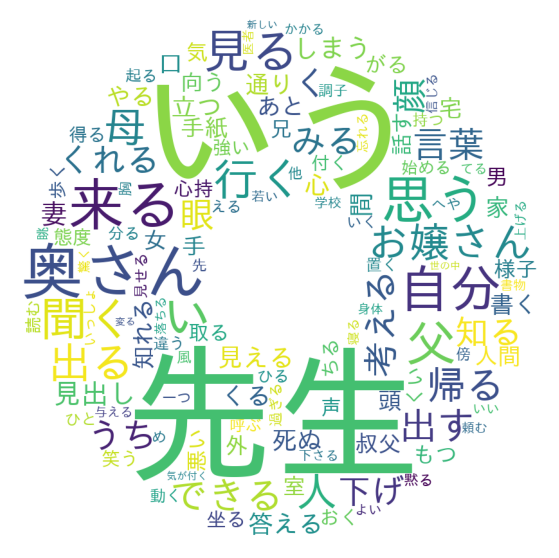

In [15]:
#ライブラリインポート
from PIL import Image
import numpy as np

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
custom_mask = np.array(Image.open('donuts.png'))
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1200,
                      height=1200
                      ).fit_words(dic_result)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **nlplot**
「nlplot」は、自然言語の可視化・分析できるライブラリです。
- N-gram bar chart, N-gram tree Map, Histogram of the word count, wordcloud, co-occurrence networks（共起ネットワーク）, sunburst chart（サンバースト）

https://www.takapy.work/entry/2020/05/17/192947

## **nlplot(uni-gram)**

In [16]:
import nlplot

npt = nlplot.NLPlot(df_text, target_col='words')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=0, min_freq=0)

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
#    stopwords=stopwords,
)

100%|██████████| 5170/5170 [00:00<00:00, 163377.09it/s]


## **nlplot(tree-map)**

In [17]:
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
#    stopwords=stopwords,
)

100%|██████████| 5170/5170 [00:00<00:00, 155079.07it/s]


## **nlplot(wordcloud)**

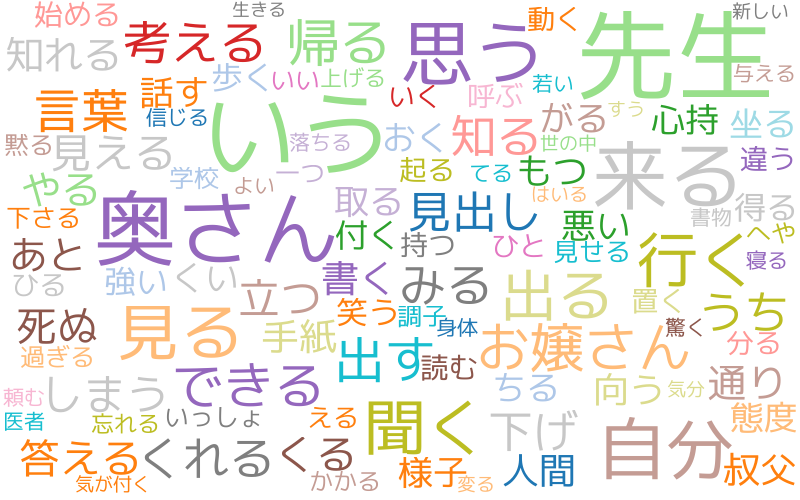

In [18]:
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
#    stopwords=stopwords,
)

## **nlplot(word_distribution)**

In [19]:
# 単語数の分布
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

## **nlplot(build_graph)**

In [20]:
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(min_edge_frequency=1,
                #stopwords=stopwords,
                )

display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

npt.co_network(
    title='Co-occurrence network',
)

Output hidden; open in https://colab.research.google.com to view.

## **nlplot(sunburst)**

In [21]:
npt.sunburst(
    title='All sentiment sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=800,
    height=600,
    #save=True
)

In [22]:
#npt.ldavis(num_topics=2, passes=5, save=True)

# **TF-IDF**
TF-IDF は ワードの重要度 を測るための指標の1つ。ワードの出現頻度とレア度が考慮された指標。TF、IDF、TF-IDF の定義は以下の通り。

\begin{eqnarray} TF(d,w) &=& \frac{文書d における語wの出現回数}{文書d における全語の出現回数の和}\\ IDF(w) &=& log(\frac{全文書数}{語w を含む文書数})\\ TFIDF(d,w) &=& TF(d,w) \times IDF(w) \end{eqnarray}

- sentence毎にTF-IDFを算出、sentence×wordマトリクスをcsv出力(tfidf.csv)します。
- [**参考**] 指定したsentenceのWord cloudを描きます。※sentenceは個別指定
- 文書全体でTF-IDFを算出した時のWord cloudも描きます。

In [23]:
# ライブラリインポート
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDFのベクトル処理
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(df_text['words'])

# TF-IDF値を「センテンス×ワード」マトリクスをデータフレーム化
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names(), index=df_text['words'])
display(df_tfidf)

,ああなる,あい,あいそ,あう,あおみ,あおむ,あか,あきる,あきれる,あく,あぐら,あける,あげる,あご,あさる,あし,あすこ,あせる,あたじけない,あたたかい,あたり,あたる,あつい,あつめる,あて,あと,あの世,あぶる,あまり,あみ,あみあげる,あやい,あり,ありがたい,ありつく,ありてい,あるじ,あれだけ,あわ,あん,...,香車,馬車馬,馬鹿馬鹿しい,馳足,馴れる,駄菓子,駄馬,駆る,駈ける,騒がしい,騒ぎ,騒ぐ,騙る,驚かす,驚き,驚く,骨組み,骨董,高い,高まる,高低,高僧,高踏,髪の毛,魔法,魔物,鳴く,鳴らす,鳴り,鳴る,鳶色,麦藁,麦酒,黄色い,黒い,黒ずむ,黙り込む,黙る,黙然,鼓膜
words,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
人 先生 呼ぶ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
先生 書く 本名 打ち明ける,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
世間 憚 ば かるい いう,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
人 呼ぶ 起す 先生 いう,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
筆 執る 心持,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
善悪 他 ひと 供する,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
妻 例外 下さる,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
妻 知る,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#「センテンス×ワード」形式のTF-IDFマトリクスをcsv出力（ローカルファイルに出力する場合はfiles.downloadの#外す）
from google.colab import files
df_tfidf.to_csv('tfidf.csv',encoding='utf_8_sig')
#files.download('tfidf.csv') 

https://zenn.dev/megane_otoko/articles/013_tf_idf_trial

## **Word Cloud with TF-IDF for each Sentence**
指定したsentenceのWord Cloudを表示しているだけなので参考程度。\
※tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0] ←この数値で描画したいsentenceを指定する。

In [25]:
# 指定センテンスのTF-IDF計算(#toarray[]の数値でセンテンス指定)
tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0]
# TF-IDFを辞書化
tfidf_dict = dict(zip(vectorizer.get_feature_names(), tfidf_vec))
# 値が正のkeyだけ残す
tfidf_dict = {k: v for k, v in tfidf_dict.items() if v > 0}

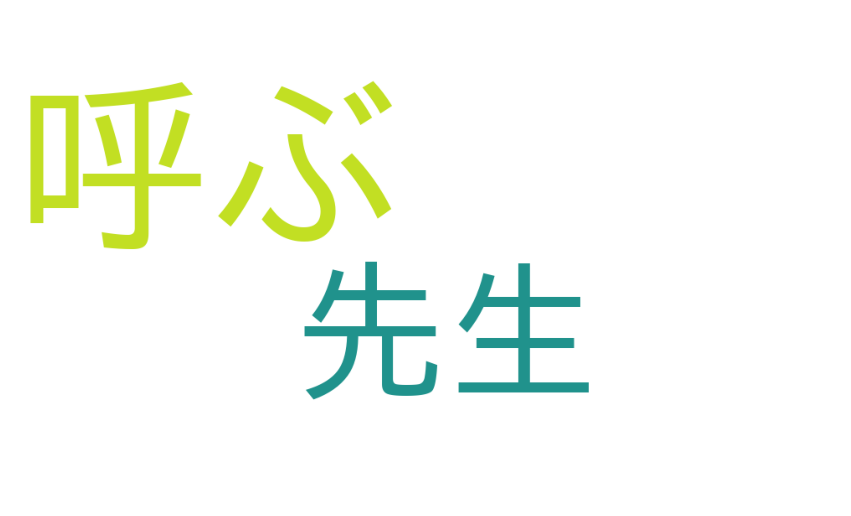

In [26]:
#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Word cloud with TF-IDF for All texts**

In [27]:
# TF-IDF計算
tfidf_vec2 = vectorizer.fit_transform(df).toarray()[0]
# TF-IDFを辞書化
tfidf_dict2 = dict(zip(vectorizer.get_feature_names(), tfidf_vec2))
# 値が正のkeyだけ残す
tfidf_dict2 = {k: v for k, v in tfidf_dict2.items() if v > 0}

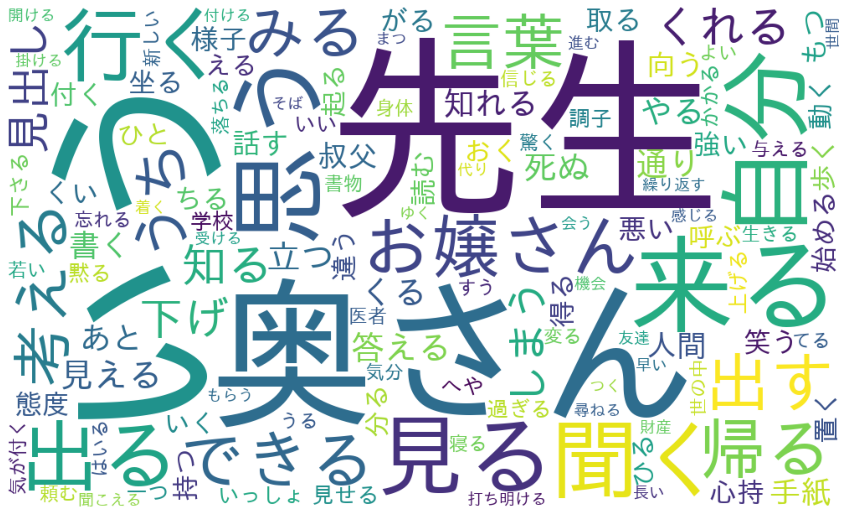

In [28]:
#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict2)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()